### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

- independent variable: to compare the means of two unrelated groups of samples such as conditions (Congruent, Incongruent).
- Dependent variable: is used to compare the means of two related samples such as the participant's recorded time for each test.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

- After quick review for our data set, it is less than 30 samples, The paired t-test will be used to determine whether there is a significant difference between the means of two results.

- Setting up the hypotheses:
    - Null hypotheses will assume there is no differences between the results as its equally.
    $$H_{0}: \mu_{con} = \mu_{incon}$$
    - Alternative hypotheses needs to prove there are differences between the results as its not-equally.
    $$H_{1}: \mu_{con} != \mu_{incon}$$

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# import importants lib for use
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# reading data file 
df = pd.read_csv('stroopdata.csv')
df.head(1)

,Congruent,Incongruent
0,12.079,19.278


In [2]:
# show descriptive statistics
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [3]:
# calculate the range for each condition
con_range = df.Congruent.describe()['max'] - df.Congruent.describe()['min']
incon_range = df.Incongruent.describe()['max'] - df.Incongruent.describe()['min']

con_range, incon_range

(13.698000000000002, 19.568000000000001)

Descriptive statistics regarding this dataset:

- Congruent mean = 14.05,	Incongruent mean = 22.06
- Congruent std  = 3.56 ,	Incongruent std  = 4.80
- Congruent range= 13.70,	Incongruent range= 19.57


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0,0.5,'Time in seconds')

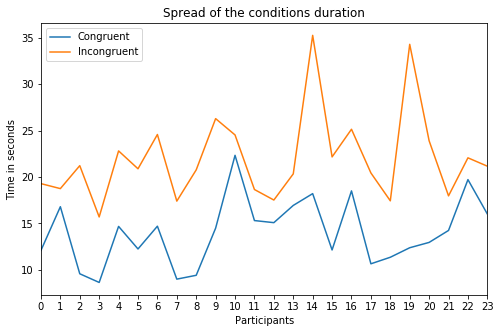

In [4]:
# spread of the conditions duration

df.plot(kind = 'line', fontsize = 10, xticks = range(df.shape[0]), figsize = (8,5))
plt.title('Spread of the conditions duration')
plt.xlabel('Participants')
plt.ylabel('Time in seconds')

**Spread of the conditions duration:**
- Above line chart shows that each participant in "Incongruent" condition has higher time spent than his result in "Congruent" condition.
- Some participants have very small differences and others have very large differences.
- According to this chart, i guess that I may reject the null after i perform the statistical test.

([<matplotlib.axis.XTick at 0x7f8429c06fd0>,
 <a list of 3 Text xticklabel objects>)

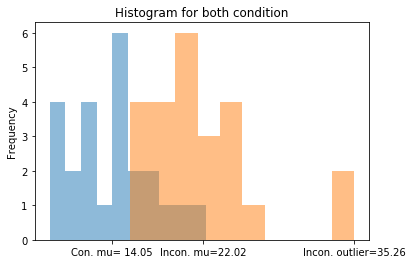

In [5]:
# histogram for both condition

ticks = [df.Congruent.describe()['mean'], df.Incongruent.describe()['mean'], df.Incongruent.describe()['max'] ]
labels = ['Con. mu= {0:.2f}'.format(ticks[0]), 'Incon. mu={0:.2f}'.format(ticks[1]), 'Incon. outlier={0:.2f}'.format(ticks[2])]

plt.hist(df.Congruent, alpha = 0.5)
plt.hist(df.Incongruent, alpha = 0.5)
plt.title('Histogram for both condition')
plt.ylabel('Frequency')
plt.xticks(ticks, labels)

**Histogram for both condition:**
- 

- Histograme shows the there are differences between congruent range and incongruent range, also there are outliers value in incongruent distribution.
- large difference in mean between the 2 group.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [6]:
# calculate degree of freedoms
degree_fr = df.shape[0]-1 # once its parid t-test

# get t-critical value for both sides
side_1 = stats.t.ppf(0.025, degree_fr) # type I error at side_1 = 5% / 2
side_2 = stats.t.ppf(0.975, degree_fr) # type I error at side_1 = 5% / 2


# preform two-sided paired t-test
t_statistic, pvalue = stats.ttest_rel(df.Congruent, df.Incongruent)

t_statistic, pvalue, side_1, side_2

(-8.020706944109957,
 4.1030005857111781e-08,
 -2.0686576104190411,
 2.0686576104190406)

**Conclucsion:**
- With confidence Level 95% and type I error 5% (2.5% each side) and degrees of freedom 23.
- Since t_statistic (-8.02) is away far from the t-critical value range (+&- 2.069) and once p_value (4.1e-8) is less than type I error, we do have strong evidence to reject the null and confirm that the difference is significant.
- Results meets my expectation, according to the line chart above, all the difference were in favor of the incongruent condition.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

- I Tried the test and i prepared myself (mentally) for the incongruent test, and actually i get better score(time) than my first congruent test.
- I guess none of the participants were prepared for the test, and may be if they had prior information regarding the test, results would be changed.